# Concentration de CO2 dans l'atmosphère depuis 1958

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de la concentration de CO2 dans l'atmosphere sont disponibles sur le [site Web de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond aux observations sur une semaine specifique. Nous téléchargeons ici le jeu de données complet, qui commence en 1958 et se termine avec une semaine récente.

In [70]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

Nous avons recupere les observations hebdomadaires

Date du telechargement : **16/04/2024**

Nous allons charger les donnees a partir d'un fichier CSV locale

In [71]:
data_file = "weekly_co2_measures.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Les 44 premières lignes du fichier CSV sont des commentaires, que nous ignorons en précisant `skiprows=44`

De plus, on renomme les colonnes du dataset pour avoir quelque chose de plus comprehensible (**Date** et **Concentration**)

In [72]:
# nous travaillons avec la version locale des donnees
raw_data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], names = ['Date', 'Concentration']) 

# Appercu des donnees (10 premieres lignes)
raw_data.head(10)

Date  Concentration
0 1958-03-29         316.19
1 1958-04-05         317.31
2 1958-04-12         317.69
3 1958-04-19         317.58
4 1958-04-26         316.48
5 1958-05-03         316.95
6 1958-05-17         317.56
7 1958-05-24         317.99
8 1958-07-05         315.85
9 1958-07-12         315.85

 Y a-t-il des points manquants dans ce jeux de données ? Non

In [73]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Concentration]
Index: []

Affichons les concentration de CO2 en fonction du temps

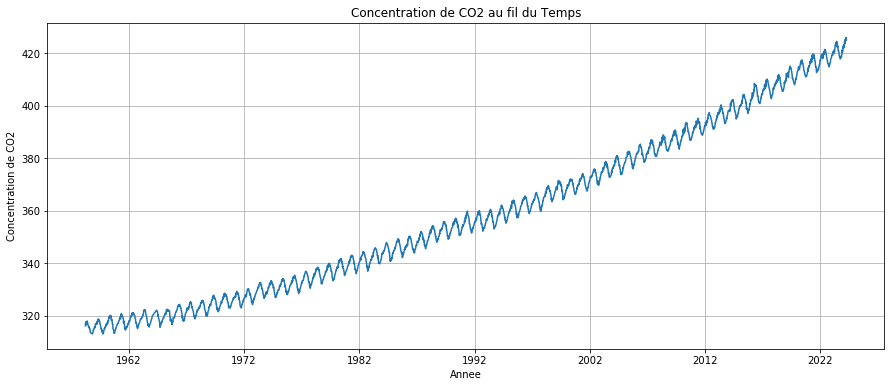

In [74]:
plt.figure(figsize=(15, 6))
plt.plot(raw_data['Date'], raw_data['Concentration'])
plt.title('Concentration de CO2 au fil du Temps')
plt.xlabel('Annee')
plt.ylabel('Concentration de CO2')
plt.grid(True)
plt.show()

Réalisation du graphique pour montrer l'oscillation lente (200 dernières lignes du tableau)

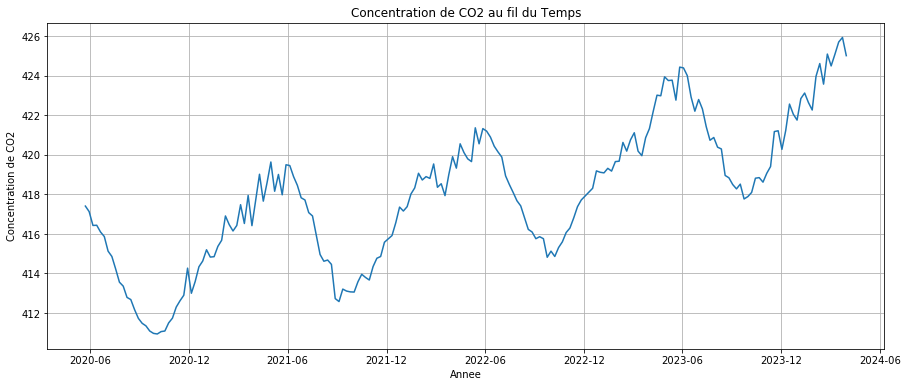

In [75]:
plt.figure(figsize=(15, 6))
plt.plot(raw_data['Date'][-200:], raw_data['Concentration'][-200:])
plt.title('Concentration de CO2 au fil du Temps')
plt.xlabel('Annee')
plt.ylabel('Concentration de CO2')
plt.grid(True)
plt.show()

Pour séparer les deux phénomènes, nous procederons de la facon suivante :
- On calcule les valeurs moyennes des concentraiton en CO2 par an et on obtent un graphique qui represente la contribution lente
- puis la différence entre les données initiales et les valeurs moyennes de chaque année est calculée pour étudier l'oscillation périodique

Ajoutons une colonne a notre dataset pour les annees et affichons un appercu des donnees

In [83]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data['Annee'] = raw_data['Date'].dt.year
# Affichons les 10 premieres lignes
raw_data.head(10)

Date  Concentration  Annee
3361 2024-01-27         422.27   2024
3362 2024-02-03         423.97   2024
3363 2024-02-10         424.62   2024
3364 2024-02-17         423.58   2024
3365 2024-02-24         425.10   2024
3366 2024-03-02         424.50   2024
3367 2024-03-09         425.09   2024
3368 2024-03-16         425.71   2024
3369 2024-03-23         425.94   2024
3370 2024-03-30         425.02   2024

In [85]:
# Affichons les 10 dernieres lignes
raw_data.tail(10)

Date  Concentration  Annee
3361 2024-01-27         422.27   2024
3362 2024-02-03         423.97   2024
3363 2024-02-10         424.62   2024
3364 2024-02-17         423.58   2024
3365 2024-02-24         425.10   2024
3366 2024-03-02         424.50   2024
3367 2024-03-09         425.09   2024
3368 2024-03-16         425.71   2024
3369 2024-03-23         425.94   2024
3370 2024-03-30         425.02   2024

Contribution lente : on calcule la valeur moyenne par an et on stocke le resultat dans une nouvelle colonne appellee Moyenne

In [105]:
raw_data['Moyenne'] = raw_data.groupby('Annee')['Concentration'].transform('mean')
# Affichons les 10 premières lignes
raw_data.head(10)

Date  Concentration  Annee  Moyenne  Oscilation
0 1958-03-29         316.19   1958  315.474       0.716
1 1958-04-05         317.31   1958  315.474       1.836
2 1958-04-12         317.69   1958  315.474       2.216
3 1958-04-19         317.58   1958  315.474       2.106
4 1958-04-26         316.48   1958  315.474       1.006
5 1958-05-03         316.95   1958  315.474       1.476
6 1958-05-17         317.56   1958  315.474       2.086
7 1958-05-24         317.99   1958  315.474       2.516
8 1958-07-05         315.85   1958  315.474       0.376
9 1958-07-12         315.85   1958  315.474       0.376

Realisation du graphique qui montre l'evolution de la concentration moyenne de CO2 par an en fonction du temps

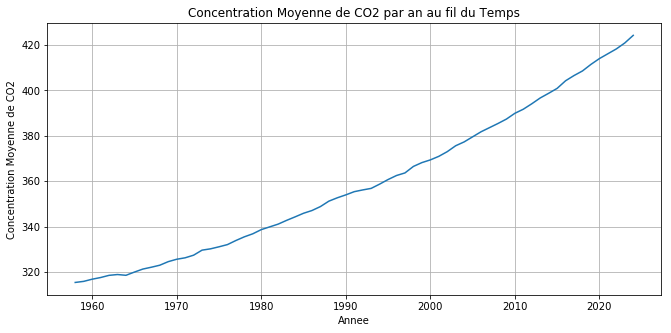

In [97]:
plt.figure(figsize=(11, 5))
plt.plot(raw_data['Annee'], raw_data['Moyenne'])
plt.title('Concentration Moyenne de CO2 par an au fil du Temps')
plt.xlabel('Annee')
plt.ylabel('Concentration Moyenne de CO2')
plt.grid(True)
plt.show()

Oscilation périodique : on calcule cette valeur en faisant la difference entre la valeur moyenne annuelle et la valeur actuelle.
On stocke le resultat dans une nouvelle colonne que l'on appelle "Oscilation"

In [99]:
raw_data['Oscilation'] = raw_data['Concentration'] - raw_data['Moyenne']

# Affichons les 10 premières lignes
raw_data.head(10)

Date  Concentration  Annee  Moyenne  Oscilation
0 1958-03-29         316.19   1958  315.474       0.716
1 1958-04-05         317.31   1958  315.474       1.836
2 1958-04-12         317.69   1958  315.474       2.216
3 1958-04-19         317.58   1958  315.474       2.106
4 1958-04-26         316.48   1958  315.474       1.006
5 1958-05-03         316.95   1958  315.474       1.476
6 1958-05-17         317.56   1958  315.474       2.086
7 1958-05-24         317.99   1958  315.474       2.516
8 1958-07-05         315.85   1958  315.474       0.376
9 1958-07-12         315.85   1958  315.474       0.376

Realisation du graphique qui montre l'evolution de l'oscilation en fonction du temps

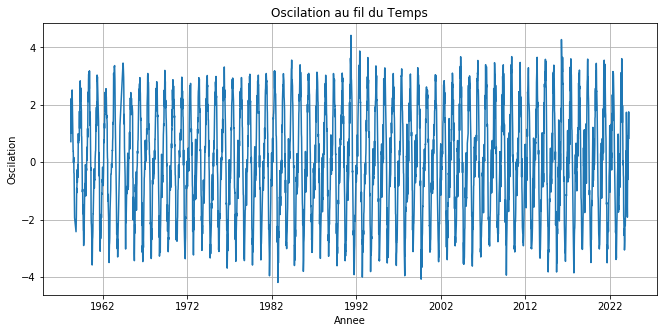

In [101]:
plt.figure(figsize=(11, 5))
plt.plot(raw_data['Date'], raw_data['Oscilation'])
plt.title('Oscilation au fil du Temps')
plt.xlabel('Annee')
plt.ylabel('Oscilation')
plt.grid(True)
plt.show()

Faisons un zoom sur les 4 dernieres annees (les 200 dernieres lignes du dataset)

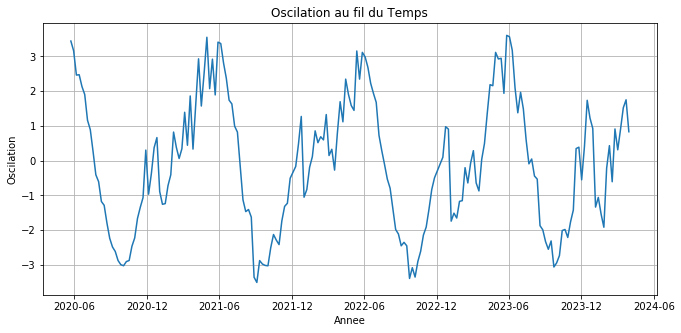

In [104]:
plt.figure(figsize=(11, 5))
plt.plot(raw_data['Date'][-200:], raw_data['Oscilation'][-200:])
plt.title('Oscilation au fil du Temps')
plt.xlabel('Annee')
plt.ylabel('Oscilation')
plt.grid(True)
plt.show()

Mise en place du modele pour extrapolation des resultats en 2025